# 05.衡量回归算法的标准

## 上一章得到的算法评价的模型
![回归算法的评价](images/回归算法的评价.png)

## 回归模型中的算法好坏衡量标准

![回归算法的评价2](images/回归算法的评价2.png)

## 为了消除m(元素个数)的影响，引入了均方误差MSE(Mean Squared Error)

![MSE](images/MSE.png)

## MSE中的平方可能会因为量纲引起问题，所以开方更好些，因此引入了`均方根误差RMSE(Root Mean Squared Error)`

![RMSE均方根误差](images/RMSE均方根误差.png)

## 直接取绝对值，简单易懂，称为`平均绝对误差MAE(Mean Absolute Error)`

![平均绝对误差MAE](images/MAE平均绝对误差.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## 波士顿房产数据

In [2]:
boston = datasets.load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [5]:
x = boston.data[:, 5] # 只取第5列的房屋数目的数据作为训练和测试数据

In [6]:
x.shape # 506行

(506,)

In [7]:
y = boston.target

In [8]:
y.shape

(506,)

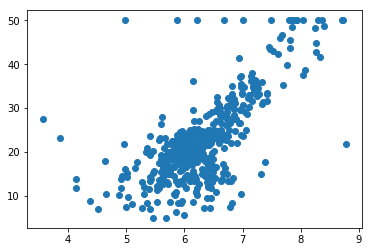

In [9]:
plt.scatter(x, y)
plt.show()

In [10]:
np.max(y)

50.0

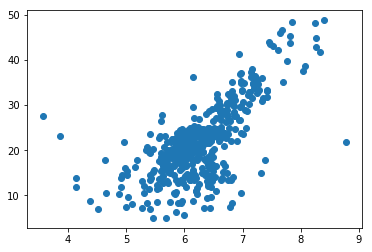

In [11]:
x = x[y < 50.0]
y = y[y < 50.0] # 筛选元素,最高值的几个点最好去掉
plt.scatter(x, y)
plt.show()

# 使用自己写地简单线性回归法

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=666)

In [13]:
x_train.shape

(392,)

In [14]:
x_test.shape

(98,)

In [15]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [16]:
regression = SimpleLinearRegression()
regression.fit(x_train, y_train)

SimpleLinearRegression()

In [17]:
regression.a_

7.8608543562689555

In [18]:
regression.b_

-27.459342806705543

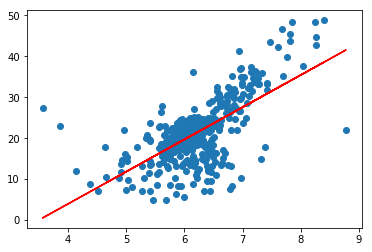

In [19]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train), color='r')
plt.show()

In [20]:
y_predict = regression.predict(x_test)

# 下面是准确度计算地指标 MSE、MAE等

## 均方误差MSE(Mean Squared Error)

In [21]:
mse_test = np.sum((y_predict-y_test)**2)/len(y_test)
mse_test

24.156602134387438

  ## 均方根误差RMSE(Root Mean Squared Error)

In [22]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

## Mean Absolute Error

In [23]:
mae_test = np.sum(np.absolute(y_predict-y_test))/len(y_test)
mae_test # 平均误差

3.5430974409463873

## 调用自己封装的计算误差的方法

In [24]:
from playML.metrics import mean_squared_error
from playML.metrics import mean_absolute_error
from playML.metrics import root_mean_squared_error

In [25]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [26]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

In [27]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

## sklearn中的误差计算实现

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [29]:
mean_absolute_error(y_true=y_test, y_pred=y_predict)

3.5430974409463873

In [30]:
mean_squared_error(y_true=y_test, y_pred =y_predict)

24.156602134387438

### RMSE要自己实现，不过就是开平方以下，很容易

In [31]:
sqrt(mean_squared_error(y_true=y_test, y_pred=y_predict))

4.914936635846635

# 06 R方的计算(R Square)

In [32]:
1 - mean_squared_error(y_test, y_predict)/np.var(y_test)  # 模型的准确度.var 是方差值

0.61293168039373225

In [33]:
help(np.var)

Help on function var in module numpy.core.fromnumeric:

var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<class 'numpy._globals._NoValue'>)
    Compute the variance along the specified axis.
    
    Returns the variance of the array elements, a measure of the spread of a
    distribution.  The variance is computed for the flattened array by
    default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose variance is desired.  If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the variance is computed.  The default is to
        compute the variance of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a variance is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computin

## 自定义实现R方计算

In [35]:
from playML.metrics import r2_score
r2_score(y_test, y_predict)

0.61293168039373225